# SOK-1006 Mikro
## Seminar 1
### Oppgave 2

In [1]:
# importér pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
sp.init_printing()

In [2]:
# definer symbolene som vi kommer til å bruke
x,p,k,r,m,s=sp.symbols('x p k r m s', positive=True)
# her har vi spesifisert at alle parametre er positive
# ofte lurt når man deler på en parameter slik at Python ikke prøver å dele på 0.

In [3]:
def ettersp(p,k,r):
    return k*p**(-r)
def tilbud (p, m, s):
    return m*p**(s)


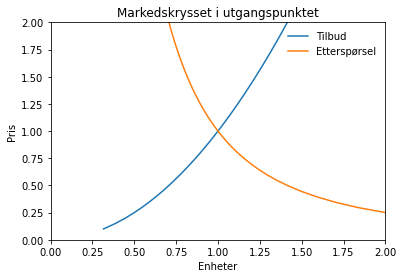

In [4]:
# tegn 100 punkter 0.1-5
p_new = np.linspace(0.1,5,100)


# tegn tilbud
plt.plot(tilbud(p_new,1,0.5), p_new, label='Tilbud')

# og etterspørsel
plt.plot(ettersp(p_new,1,0.5),p_new,label='Etterspørsel')

#legend:
plt.legend(loc='upper right', frameon=False)

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

plt.title('Markedskrysset i utgangspunktet')

# tilpass aksene
plt.xlim((0,2))
plt.ylim((0,2))

In [5]:
# x,p,k,r,m,s=sp.symbols('x p k r m s', positive=True)
eq_cond=sp.Eq(ettersp(p,1,0.5),tilbud(p,1,0.5))
eq_cond

In [6]:
# likevektspris
p_eq=sp.solve(eq_cond,p)[0]
p_eq
# likevektskvantum
x_eq=ettersp(p_eq,1,0.5)
print(f"""
Likevektspris er {p_eq}
Likevektskvantum er {x_eq}
""")


Likevektspris er 1.00000000000000
Likevektskvantum er 1.00000000000000



In [7]:
eq_cond_gen=sp.Eq(ettersp(p,k,r),tilbud(p,m,s))
eq_cond_gen


In [8]:
# likevektspris
p_eq_gen=sp.solve(eq_cond_gen,p)[0]
sp.simplify(p_eq_gen)

In [9]:
# likevektskvantum
x_eq_gen= tilbud(p_eq_gen,m,s)
x_eq_gen

Hvordan påvirkes likevekten av en parameterendring?

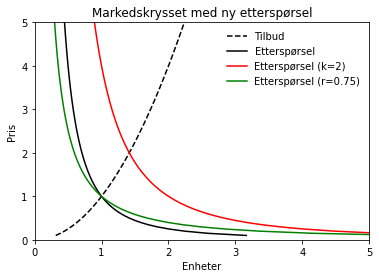

In [10]:
# tegn de opprinnelige funksjoner i sort
# endre én parameter om gangen
# øk k til k=2 (rødt)
# øk r til 0.75 (green)



# tegn opprinnelig tilbud og etterspørsel
plt.plot(tilbud(p_new,1,0.5), p_new, color='black',linestyle='dashed',label='Tilbud')
plt.plot(ettersp(p_new,1,0.5),p_new,color='black',label='Etterspørsel')

# og ny etterspørsel
plt.plot(ettersp(p_new,2,0.5),p_new,color='red',label='Etterspørsel (k=2)')
plt.plot(ettersp(p_new,1,0.75),p_new,color='green',label='Etterspørsel (r=0.75)')

#legend:
plt.legend(loc='upper right', frameon=False)

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

plt.title('Markedskrysset med ny etterspørsel')

# tilpass aksene
plt.xlim((0,5))
plt.ylim((0,5))

Pris og kvantum økes når k økes i dette eksempelet.   
Når r endres er likevektsverdiene det samme!    
Men dette er pga at k=m=1 (1 opphøyd til en potens er alltid 1).    
La oss vise hva som skjer når (k=2, r=.5) endres til (k=2, r=.75).

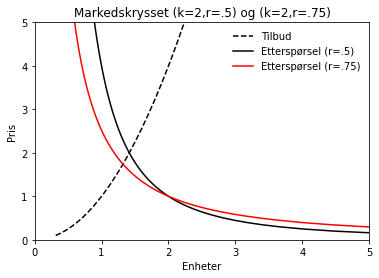

In [11]:
# tegn tilbud og etterspørsel k=2, r=.5
plt.plot(tilbud(p_new,1,0.5), p_new,color='black',linestyle='dashed',label='Tilbud')
plt.plot(ettersp(p_new,2,0.5),p_new,color='black',label='Etterspørsel (r=.5)')

# og ny etterspørsel k=2, r=0.75 (rødt)
plt.plot(ettersp(p_new,2,0.75),p_new,color='red',label='Etterspørsel (r=.75)')


#legend:
plt.legend(loc='upper right', frameon=False)

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

plt.title('Markedskrysset (k=2,r=.5) og (k=2,r=.75)')

# tilpass aksene
plt.xlim((0,5))
plt.ylim((0,5))

Kvantum og pris faller når r øker i dette eksempelet! 

La oss gjøre det samme med tilbud, og sammenlikne (m=2,s=.5) med (m=2.5,s=.5) og (m=2,s=.75)

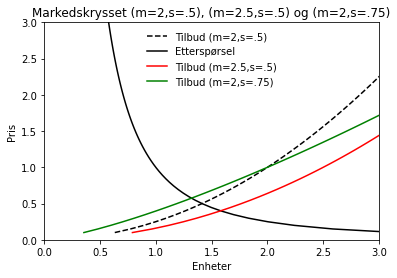

In [12]:
# tegn tilbud og etterspørsel k=1, r=.5, m=2, s=.5
plt.plot(tilbud(p_new,2,0.5), p_new,color='black',linestyle='dashed',label='Tilbud (m=2,s=.5)')
plt.plot(ettersp(p_new,1,0.5),p_new,color='black',label='Etterspørsel')

# og nytt tilbud m=2.5, s=0.5 (rødt)
plt.plot(tilbud(p_new,2.5,0.5), p_new,color='red',label='Tilbud (m=2.5,s=.5)')

# og nytt tilbud m=2, s=0.75 (grønn)
plt.plot(tilbud(p_new,2,0.75), p_new,color='green',label='Tilbud (m=2,s=.75)')


#legend:
plt.legend(loc='upper center', frameon=False)

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

plt.title('Markedskrysset (m=2,s=.5), (m=2.5,s=.5) og (m=2,s=.75)')

# tilpass aksene
plt.xlim((0,3))
plt.ylim((0,3))

For disse eksemplene kan vi konkludere med at likevektskvantum øker og -pris faller når m og/eller s øker.

### Komparativ statikk: analytisk tilnærming

In [13]:
# Effekten av en økning i k på likevektspris
p_eq_simp=sp.simplify(p_eq_gen)
diff_p_k=sp.diff(p_eq_simp,k)

sp.simplify(diff_p_k)

Det er mulig å forenkle dette noe $\left ( \frac{k^{1-r-s}}{m} \right )^{\frac{1}{r+s}}\frac{1}{r+s}$. Ettersom alle parametre er positive, kan vi konkludere med at dette uttrykket er positivt. En økning i k fører alltid til en økning i likevektsprisen.

In [14]:
# Effekten av en økning i r på likevektspris
diff_p_r=sp.diff(p_eq_simp,r)

sp.simplify(diff_p_r)

Dette er et log uttrykk. Husk at $log(x)>(=)(<)0$ for $x>(=)(<)1$. Dvs at uttrykket er positivt dersom tallet i parentes er mindre enn 1. Potensen her er et positivt tall. Kall den z, slik at vi spør om $\left ( \frac{k}{m} \right )^{z}<1$ dvs $ \frac{k}{m}<1^{\frac{1}{z}}=1$ som er det samme som å spørre om  $m>k$. Konklusjon: dersom $m>(<)k$ vil en økning i r gi en økning (reduksjon) i likevektspris. Når $k=m$ vil en endring i r ikke påvirke likevektsprisen $(log(1)=0)$.

La oss undersøke dette ved å sette m=2, k=1, s=0.5 og r=0.5 og r=0.75. Vår prediskjon er at denne økningen i r vil føre til en økning i pris ettersom m>k.

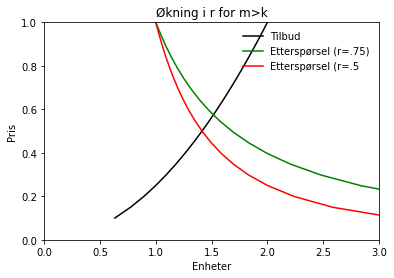

In [15]:
# tegn tilbud (sort) og etterspørsel (rødt for r=0.5, grønn for r=0.75)
plt.plot(tilbud(p_new,2,0.5),p_new,color='black',label='Tilbud')
plt.plot(ettersp(p_new,1,0.75),p_new,color='green',label='Etterspørsel (r=.75)')
plt.plot(ettersp(p_new,1,0.5),p_new,color='red',label='Etterspørsel (r=.5')


#legend:
plt.legend(loc='upper right', frameon=False)

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

plt.title('Økning i r for m>k')

# tilpass aksene
plt.xlim((0,3))
plt.ylim((0,1))

Som forventet.
La oss undersøke ved å sette m=1, k=2, s=0.5 og r=0.5 og r=0.75. Vår prediskjon er at denne økningen i r vil føre til en reduksjon i pris.

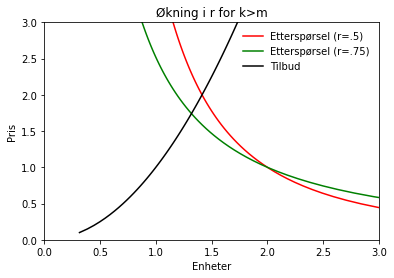

In [16]:
#m=1,k=2

# tegn tilbud (sort) og etterspørsel (rødt for r=0.5, grønn for r=0.75)
plt.plot(ettersp(p_new,2,0.5),p_new,color='red',label='Etterspørsel (r=.5)')
plt.plot(ettersp(p_new,2,0.75),p_new,color='green',label='Etterspørsel (r=.75)')
plt.plot(tilbud(p_new,1,0.5),p_new,color='black',label='Tilbud')


#legend:
plt.legend(loc='upper right', frameon=False)

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

plt.title('Økning i r for k>m')

# tilpass aksene
plt.xlim((0,3))
plt.ylim((0,3))

Som sammenfaller med vår prediksjon!

In [17]:
# Effekten av en økning i m på likevektspris
diff_p_m=sp.diff(p_eq_simp,m)

sp.simplify(diff_p_m)

En økning i m reduserer likevektsprisen.

In [18]:
# Effekten av en økning i s på likevektspris
diff_p_s=sp.diff(p_eq_simp,s)

sp.simplify(diff_p_s)

Samme uttrykk som for endringen i r!     
Konklusjon: dersom $m>(<)k$ vil en økning i s gi en økning (reduksjon) i likevektspris. Når $k=m$ vil en endring i s ikke påvirke likevektsprisen $(log(1)=0)$.